## **Course:** CS552 - Generative AI  
# Assignment 3 - Variational Autoencoders (VAEs)

## Theory Questions

---

### Q1: Why is the KL Divergence term important in the VAE loss function?

The KL Divergence term in the VAE loss function serves several critical purposes:

1. **Regularization of the Latent Space**: The KL divergence term regularizes the learned latent distribution by encouraging it to match a prior distribution (typically a standard normal distribution N(0, I)). Without this term, the encoder could learn arbitrary latent distributions, leading to overfitting and poor generalization.

2. **Enabling Meaningful Sampling**: By ensuring the latent space follows a known prior distribution, we can sample from this distribution during generation. If the latent space doesn't follow a standard normal distribution, we wouldn't know how to sample meaningful latent vectors for generating new images.

3. **Preventing Posterior Collapse**: The KL term prevents the encoder from collapsing all inputs to the same latent representation. It encourages the model to use the full capacity of the latent space by penalizing deviations from the prior.

4. **Smooth and Continuous Latent Space**: The KL divergence encourages a smooth, continuous latent space where similar inputs map to nearby points. This enables meaningful interpolation and arithmetic operations in the latent space.

5. **Balancing Reconstruction and Regularization**: The VAE loss is: L = Reconstruction Loss + β·KL(q(z|x) || p(z)), where β controls the trade-off. The KL term ensures we don't just minimize reconstruction error at the cost of a poorly structured latent space.

Mathematically, the KL divergence term is: KL(q(z|x) || p(z)) = -0.5·Σ(1 + log(σ²) - μ² - σ²), which penalizes the encoder's mean (μ) and variance (σ²) from deviating too far from the standard normal prior.

---

### Q2: How does the reparameterization trick enable backpropagation through the stochastic layers of a VAE?

The reparameterization trick is essential for training VAEs because it allows gradients to flow through the stochastic sampling operation during backpropagation.

**The Problem Without Reparameterization:**
- In a VAE, the encoder outputs parameters (μ, σ) of a distribution, and we need to sample z ~ q(z|x) = N(μ, σ²).
- Direct sampling (z = sample from N(μ, σ²)) is a non-differentiable operation, so gradients cannot flow back through the sampling step.
- This prevents the encoder from learning, as it cannot receive gradient signals from the decoder.

**The Reparameterization Solution:**
Instead of sampling directly, we reparameterize the sampling as:
```
z = μ + σ ⊙ ε, where ε ~ N(0, I)
```

**How It Works:**
1. **Separate Stochastic and Deterministic Parts**: The randomness (ε) is sampled from a fixed distribution N(0, I) that doesn't depend on the model parameters. The deterministic part (μ + σ ⊙ ε) depends on the learnable parameters μ and σ.

2. **Gradient Flow**: Now, gradients can flow through the deterministic computation:
   - ∂L/∂μ = ∂L/∂z · ∂z/∂μ = ∂L/∂z · 1 = ∂L/∂z
   - ∂L/∂σ = ∂L/∂z · ∂z/∂σ = ∂L/∂z · ε

3. **Training Process**: During training:
   - Sample ε from N(0, I) (this is independent of model parameters)
   - Compute z = μ + σ ⊙ ε (this is differentiable)
   - Pass z through the decoder
   - Compute loss and backpropagate through the entire network

**Key Insight**: By moving the randomness to an external source (ε), we make the sampling operation differentiable with respect to μ and σ, enabling end-to-end training of the VAE.

---

### Q3: Why does a VAE use a probabilistic latent space instead of a fixed latent space?

A VAE uses a probabilistic latent space (where each input maps to a distribution over latent codes) instead of a fixed latent space (where each input maps to a single point) for several important reasons:

1. **Generative Capability**: The probabilistic nature allows the model to generate new samples. We can sample from the learned prior distribution p(z) and decode to generate new data points. With a fixed mapping, we can only reconstruct existing inputs.

2. **Handling Uncertainty and Variability**: Real-world data often has inherent variability. A probabilistic latent space captures this uncertainty by representing each input as a distribution rather than a single point. This is especially important when:
   - The same input could have multiple valid representations
   - There's ambiguity in the data
   - We want to model the natural variation in the data

3. **Regularization and Generalization**: The probabilistic formulation with KL divergence regularization prevents overfitting. It encourages the model to learn a smooth, well-structured latent space rather than memorizing exact mappings.

4. **Smooth Interpolation**: A probabilistic latent space, when regularized properly, creates a smooth manifold where interpolation between points produces meaningful intermediate samples. Fixed mappings often create discontinuities.

5. **Theoretical Foundation**: The probabilistic approach is grounded in variational inference and maximum likelihood estimation. It allows us to:
   - Maximize the evidence lower bound (ELBO)
   - Approximate the true posterior p(z|x)
   - Learn a generative model p(x|z) that can sample new data

6. **Handling Missing or Noisy Data**: Probabilistic encoders can handle uncertainty in the input, making the model more robust to noise and missing information.

7. **Multiple Valid Representations**: Some inputs may have multiple equally valid latent representations. A probabilistic encoder can capture this by mapping to a distribution that covers all valid representations.

**Comparison with Autoencoders**: Traditional autoencoders use fixed mappings (x → z → x'), which are great for compression and denoising but cannot generate new samples. VAEs extend this by making the latent space probabilistic, enabling true generative modeling.

---

### Q4: What role does KL Divergence play in ensuring a smooth latent space?

The KL Divergence term plays a crucial role in ensuring a smooth, well-structured latent space through several mechanisms:

1. **Enforcing Prior Structure**: The KL divergence KL(q(z|x) || p(z)) penalizes deviations of the learned posterior q(z|x) from the prior p(z) = N(0, I). By constraining the latent distributions to be close to a standard normal, it ensures:
   - The latent space has a known, regular structure
   - Similar inputs map to similar regions in latent space
   - The space is continuous rather than fragmented

2. **Preventing Latent Space Collapse**: Without KL regularization, the encoder could:
   - Map all inputs to the same point (mode collapse)
   - Create disconnected regions in latent space
   - Produce arbitrary, unstructured distributions
   
   The KL term prevents these issues by penalizing distributions that deviate from the smooth, continuous prior.

3. **Encouraging Compact Representations**: The KL divergence encourages the encoder to use the latent space efficiently:
   - It penalizes large variances (σ²), preventing the latent space from being too spread out
   - It penalizes means (μ) far from zero, keeping representations centered
   - This creates a compact, well-organized latent space

4. **Enabling Smooth Interpolation**: A smooth latent space means:
   - Linear interpolation between two latent points produces meaningful intermediate samples
   - Nearby points in latent space correspond to similar data points
   - The decoder can smoothly map from any point in the latent space
   
   The KL term ensures this by regularizing the learned distributions to form a continuous manifold.

5. **Mathematical Formulation**: The KL divergence term:
   ```
   KL(q(z|x) || p(z)) = -0.5·Σ(1 + log(σ²) - μ² - σ²)
   ```
   
   This term:
   - Penalizes large μ² (keeps means near zero)
   - Penalizes very small or very large σ² (keeps variances reasonable)
   - Encourages σ² ≈ 1 (matching the prior variance)

6. **Preventing Posterior Collapse**: When the KL term is too weak (or β is too small), the model may ignore the latent space and learn to reconstruct directly. The KL term ensures the model actually uses the latent representation, maintaining its structure.

7. **Controllable Smoothness**: The β parameter in β-VAE controls the strength of the KL term:
   - Higher β: Stronger regularization, smoother but potentially less expressive latent space
   - Lower β: Weaker regularization, more expressive but potentially less smooth latent space
   
   This allows balancing between reconstruction quality and latent space smoothness.

**Visual Analogy**: Think of the KL divergence as a "rubber band" that pulls the learned latent distributions toward the standard normal distribution, creating a smooth, continuous, and well-organized latent space that enables meaningful generation and interpolation.

## Coding Tasks
---

## Overview

In this assignment, the VAE will be expanded by incorporating convolutional layers in both the encoder and decoder networks. Convolutional layers are particularly effective for image data, as they can capture spatial hierarchies better than fully connected layers. By using this architecture on the CIFAR-10 dataset (a dataset of small, colorful images), the VAE will be able to learn a more effective latent representation, which should improve the quality of generated images.

The second task involves interpolation in the latent space. By interpolating between two points in the latent space (corresponding to two different images), we can observe how smoothly the VAE transitions between two images. This task highlights the structure of the learned latent space and shows the generative capabilities of the VAE.

Finally, applying the VAE to a new dataset (such as CelebA, a dataset of celebrity faces) and visualizing the generated images allows us to see how well the model generalizes to different kinds of data and how the latent space is structured for more complex, real-world images.

## Task 1: Convolutional VAE on CIFAR-10

Modify the VAE architecture to use convolutional layers for both the encoder and decoder, and train it on the CIFAR-10 dataset. This modification will allow the model to capture spatial relationships within images more effectively, improving its ability to generate high-quality images. After training, compare the generated images with those from a fully connected VAE.

In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [2]:
# Define Convolutional VAE architecture
class ConvVAE(nn.Module):
    def __init__(self, latent_dim=128, image_size=32, channels=3):
        super(ConvVAE, self).__init__()
        self.latent_dim = latent_dim
        self.image_size = image_size
        self.channels = channels
        
        # Encoder: Convolutional layers
        self.encoder = nn.Sequential(
            # Input: 3x32x32
            nn.Conv2d(channels, 32, kernel_size=4, stride=2, padding=1),  # 32x16x16
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1),  # 64x8x8
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),  # 128x4x4
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),  # 256x2x2
            nn.ReLU(),
        )
        
        # Calculate flattened size: 256 * 2 * 2 = 1024
        self.fc_mu = nn.Linear(256 * 2 * 2, latent_dim)
        self.fc_logvar = nn.Linear(256 * 2 * 2, latent_dim)
        
        # Decoder: Transposed convolutional layers
        self.decoder_input = nn.Linear(latent_dim, 256 * 2 * 2)
        
        self.decoder = nn.Sequential(
            # Input: 256x2x2
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),  # 128x4x4
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),  # 64x8x8
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),  # 32x16x16
            nn.ReLU(),
            nn.ConvTranspose2d(32, channels, kernel_size=4, stride=2, padding=1),  # 3x32x32
            nn.Sigmoid()  # Output values between 0 and 1
        )
    
    def encode(self, x):
        """Encode input image to latent space parameters"""
        h = self.encoder(x)
        h = h.view(h.size(0), -1)  # Flatten
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar
    
    def reparameterize(self, mu, logvar):
        """Reparameterization trick to sample from latent space"""
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def decode(self, z):
        """Decode latent vector to image"""
        h = self.decoder_input(z)
        h = h.view(h.size(0), 256, 2, 2)  # Reshape to 256x2x2
        return self.decoder(h)
    
    def forward(self, x):
        """Forward pass through the VAE"""
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        recon = self.decode(z)
        return recon, mu, logvar


# VAE Loss function
def vae_loss(recon_x, x, mu, logvar, beta=1.0):
    """
    VAE loss = Reconstruction Loss + β * KL Divergence
    
    Args:
        recon_x: Reconstructed images
        x: Original images
        mu: Mean of latent distribution
        logvar: Log variance of latent distribution
        beta: Weight for KL divergence term
    """
    # Reconstruction loss (Binary Cross Entropy)
    recon_loss = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
    
    # KL Divergence: -0.5 * sum(1 + logvar - mu^2 - exp(logvar))
    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    
    return recon_loss + beta * kl_loss, recon_loss, kl_loss

In [3]:
# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    # CIFAR-10 images are already normalized to [0, 1] by ToTensor()
])

# Download and load CIFAR-10 training dataset
train_dataset = datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

train_loader = DataLoader(
    train_dataset,
    batch_size=128,
    shuffle=True,
    num_workers=2
)

print(f'CIFAR-10 dataset loaded: {len(train_dataset)} training images')
print(f'Image shape: {train_dataset[0][0].shape}')

Files already downloaded and verified
CIFAR-10 dataset loaded: 50000 training images
Image shape: torch.Size([3, 32, 32])


Model initialized with latent dimension: 128
Total parameters: 1,774,531
Epoch 1/20, Batch 0/391, Loss: 2140.6960, Recon: 2140.6589, KL: 0.0371
Epoch 1/20, Batch 100/391, Loss: 2028.4296, Recon: 2020.3823, KL: 8.0473
Epoch 1/20, Batch 200/391, Loss: 1955.4945, Recon: 1929.9799, KL: 25.5147
Epoch 1/20, Batch 300/391, Loss: 1929.0101, Recon: 1909.1272, KL: 19.8830
Epoch 1 completed - Avg Loss: 1977.6781, Avg Recon: 1961.6250, Avg KL: 16.0531
------------------------------------------------------------
Epoch 2/20, Batch 0/391, Loss: 1901.0200, Recon: 1878.8770, KL: 22.1430
Epoch 2/20, Batch 100/391, Loss: 1872.0024, Recon: 1850.7430, KL: 21.2594
Epoch 2/20, Batch 200/391, Loss: 1891.3063, Recon: 1868.5054, KL: 22.8010
Epoch 2/20, Batch 300/391, Loss: 1878.0814, Recon: 1852.4889, KL: 25.5926
Epoch 2 completed - Avg Loss: 1876.0692, Avg Recon: 1852.5136, Avg KL: 23.5557
------------------------------------------------------------
Epoch 3/20, Batch 0/391, Loss: 1904.5259, Recon: 1880.9824, K

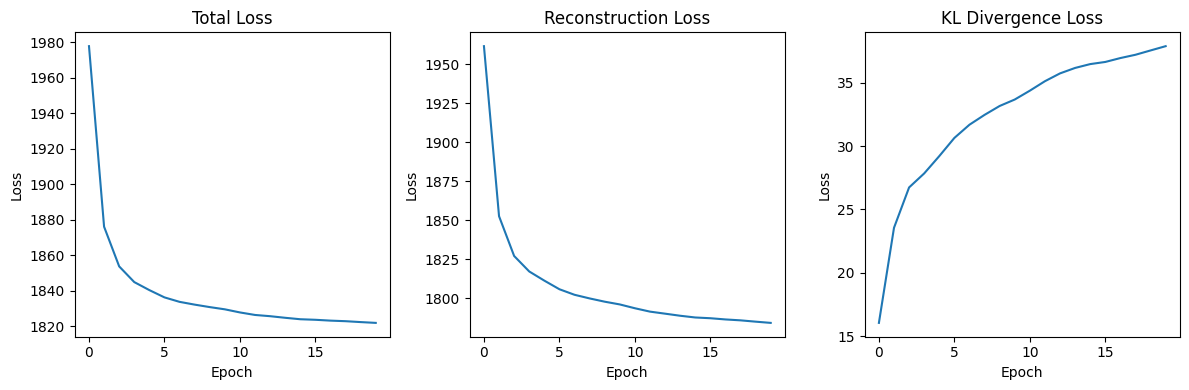

In [4]:
# Initialize model, optimizer, and training parameters
latent_dim = 128
model = ConvVAE(latent_dim=latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 20

# Training history
train_losses = []
recon_losses = []
kl_losses = []

print(f'Model initialized with latent dimension: {latent_dim}')
print(f'Total parameters: {sum(p.numel() for p in model.parameters()):,}')

# Training loop
model.train()
for epoch in range(num_epochs):
    epoch_loss = 0
    epoch_recon = 0
    epoch_kl = 0
    
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        
        # Forward pass
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        
        # Calculate loss
        loss, recon_loss, kl_loss = vae_loss(recon_batch, data, mu, logvar, beta=1.0)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        # Accumulate losses
        epoch_loss += loss.item()
        epoch_recon += recon_loss.item()
        epoch_kl += kl_loss.item()
        
        if batch_idx % 100 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}/{len(train_loader)}, '
                  f'Loss: {loss.item()/len(data):.4f}, '
                  f'Recon: {recon_loss.item()/len(data):.4f}, '
                  f'KL: {kl_loss.item()/len(data):.4f}')
    
    # Average losses for the epoch
    avg_loss = epoch_loss / len(train_loader.dataset)
    avg_recon = epoch_recon / len(train_loader.dataset)
    avg_kl = epoch_kl / len(train_loader.dataset)
    
    train_losses.append(avg_loss)
    recon_losses.append(avg_recon)
    kl_losses.append(avg_kl)
    
    print(f'Epoch {epoch+1} completed - Avg Loss: {avg_loss:.4f}, '
          f'Avg Recon: {avg_recon:.4f}, Avg KL: {avg_kl:.4f}')
    print('-' * 60)

print('Training completed!')

# Plot training curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(train_losses)
plt.title('Total Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 3, 2)
plt.plot(recon_losses)
plt.title('Reconstruction Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 3, 3)
plt.plot(kl_losses)
plt.title('KL Divergence Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

### Comparison: Fully Connected VAE

Now let's implement a fully connected VAE for comparison with the convolutional VAE.

In [5]:
# Define Fully Connected VAE architecture
class FullyConnectedVAE(nn.Module):
    def __init__(self, latent_dim=128, image_size=32, channels=3):
        super(FullyConnectedVAE, self).__init__()
        self.latent_dim = latent_dim
        self.image_size = image_size
        self.channels = channels
        self.input_size = channels * image_size * image_size  # 3 * 32 * 32 = 3072
        
        # Encoder: Fully connected layers
        self.encoder = nn.Sequential(
            nn.Linear(self.input_size, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
        )
        
        self.fc_mu = nn.Linear(128, latent_dim)
        self.fc_logvar = nn.Linear(128, latent_dim)
        
        # Decoder: Fully connected layers
        self.decoder_input = nn.Linear(latent_dim, 128)
        
        self.decoder = nn.Sequential(
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, self.input_size),
            nn.Sigmoid()
        )
    
    def encode(self, x):
        """Encode input image to latent space parameters"""
        x = x.view(x.size(0), -1)  # Flatten
        h = self.encoder(x)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar
    
    def reparameterize(self, mu, logvar):
        """Reparameterization trick to sample from latent space"""
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def decode(self, z):
        """Decode latent vector to image"""
        h = self.decoder_input(z)
        recon = self.decoder(h)
        return recon.view(-1, self.channels, self.image_size, self.image_size)
    
    def forward(self, x):
        """Forward pass through the VAE"""
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        recon = self.decode(z)
        return recon, mu, logvar


# Initialize fully connected VAE
fc_model = FullyConnectedVAE(latent_dim=latent_dim).to(device)
fc_optimizer = optim.Adam(fc_model.parameters(), lr=1e-3)

print(f'Fully Connected VAE initialized with latent dimension: {latent_dim}')
print(f'Total parameters: {sum(p.numel() for p in fc_model.parameters()):,}')

Fully Connected VAE initialized with latent dimension: 128
Total parameters: 3,527,680


FC-VAE Epoch 1/20, Batch 0/391, Loss: 2131.2522, Recon: 2130.9556, KL: 0.2965
FC-VAE Epoch 1/20, Batch 100/391, Loss: 2008.0519, Recon: 1988.1426, KL: 19.9093
FC-VAE Epoch 1/20, Batch 200/391, Loss: 1964.3589, Recon: 1948.6254, KL: 15.7335
FC-VAE Epoch 1/20, Batch 300/391, Loss: 1964.6274, Recon: 1949.7305, KL: 14.8970
FC-VAE Epoch 1 completed - Avg Loss: 1994.7202, Avg Recon: 1980.7434, Avg KL: 13.9768
------------------------------------------------------------
FC-VAE Epoch 2/20, Batch 0/391, Loss: 1932.4397, Recon: 1918.6490, KL: 13.7907
FC-VAE Epoch 2/20, Batch 100/391, Loss: 1928.0782, Recon: 1915.8726, KL: 12.2057
FC-VAE Epoch 2/20, Batch 200/391, Loss: 1935.9468, Recon: 1925.6379, KL: 10.3089
FC-VAE Epoch 2/20, Batch 300/391, Loss: 1945.1445, Recon: 1936.1421, KL: 9.0025
FC-VAE Epoch 2 completed - Avg Loss: 1938.9698, Avg Recon: 1928.3639, Avg KL: 10.6059
------------------------------------------------------------
FC-VAE Epoch 3/20, Batch 0/391, Loss: 1933.6591, Recon: 1923.309

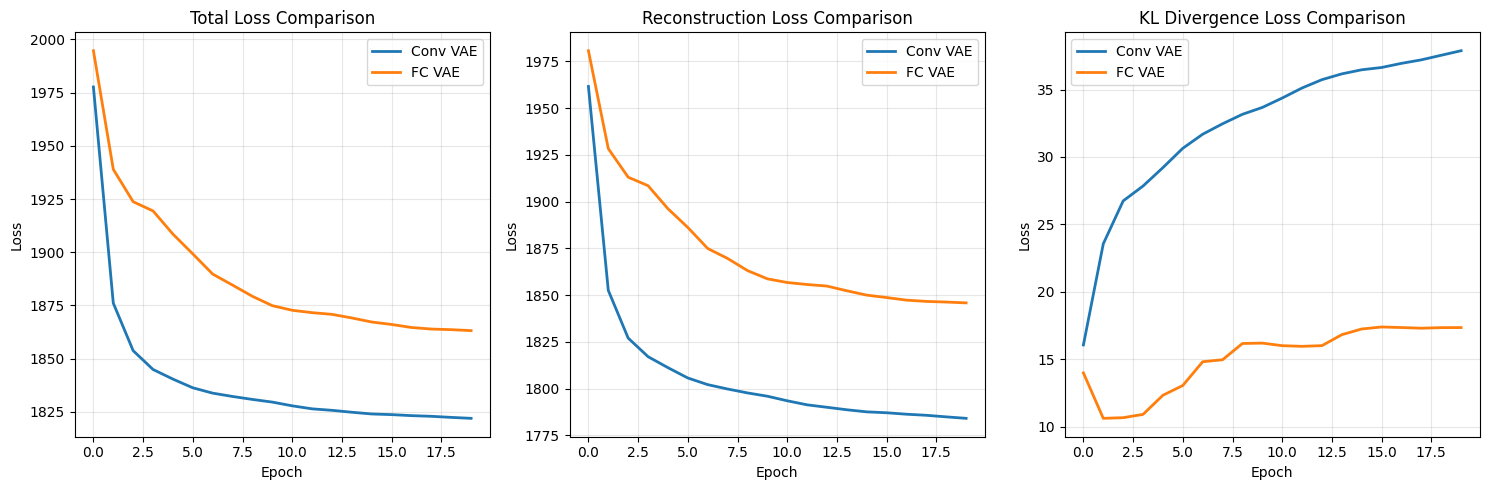

In [6]:
# Train Fully Connected VAE
fc_train_losses = []
fc_recon_losses = []
fc_kl_losses = []

fc_model.train()
for epoch in range(num_epochs):
    epoch_loss = 0
    epoch_recon = 0
    epoch_kl = 0
    
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        
        # Forward pass
        fc_optimizer.zero_grad()
        recon_batch, mu, logvar = fc_model(data)
        
        # Calculate loss
        loss, recon_loss, kl_loss = vae_loss(recon_batch, data, mu, logvar, beta=1.0)
        
        # Backward pass
        loss.backward()
        fc_optimizer.step()
        
        # Accumulate losses
        epoch_loss += loss.item()
        epoch_recon += recon_loss.item()
        epoch_kl += kl_loss.item()
        
        if batch_idx % 100 == 0:
            print(f'FC-VAE Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}/{len(train_loader)}, '
                  f'Loss: {loss.item()/len(data):.4f}, '
                  f'Recon: {recon_loss.item()/len(data):.4f}, '
                  f'KL: {kl_loss.item()/len(data):.4f}')
    
    # Average losses for the epoch
    avg_loss = epoch_loss / len(train_loader.dataset)
    avg_recon = epoch_recon / len(train_loader.dataset)
    avg_kl = epoch_kl / len(train_loader.dataset)
    
    fc_train_losses.append(avg_loss)
    fc_recon_losses.append(avg_recon)
    fc_kl_losses.append(avg_kl)
    
    print(f'FC-VAE Epoch {epoch+1} completed - Avg Loss: {avg_loss:.4f}, '
          f'Avg Recon: {avg_recon:.4f}, Avg KL: {avg_kl:.4f}')
    print('-' * 60)

print('Fully Connected VAE training completed!')

# Plot training curves comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Conv VAE', linewidth=2)
plt.plot(fc_train_losses, label='FC VAE', linewidth=2)
plt.title('Total Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(recon_losses, label='Conv VAE', linewidth=2)
plt.plot(fc_recon_losses, label='FC VAE', linewidth=2)
plt.title('Reconstruction Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(kl_losses, label='Conv VAE', linewidth=2)
plt.plot(fc_kl_losses, label='FC VAE', linewidth=2)
plt.title('KL Divergence Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

COMPARISON: Convolutional VAE vs Fully Connected VAE

1. Generated Images Comparison (from random latent vectors):


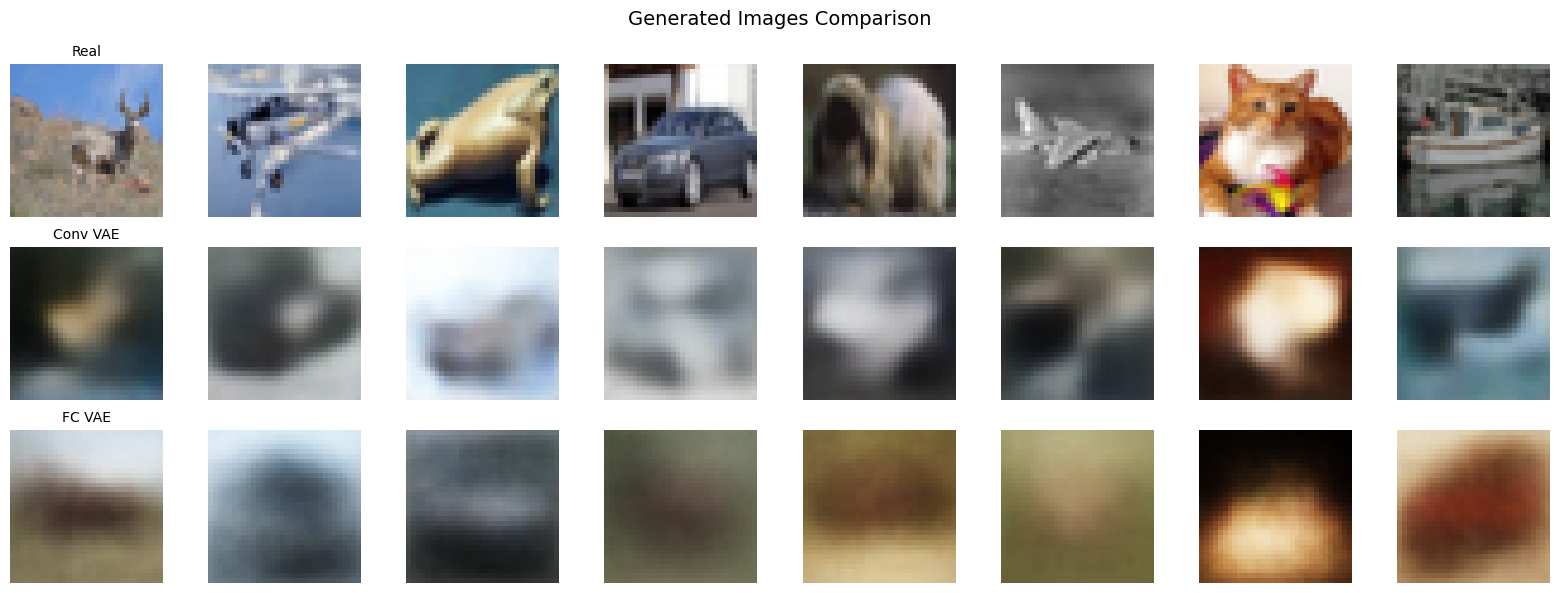


2. Reconstruction Comparison:


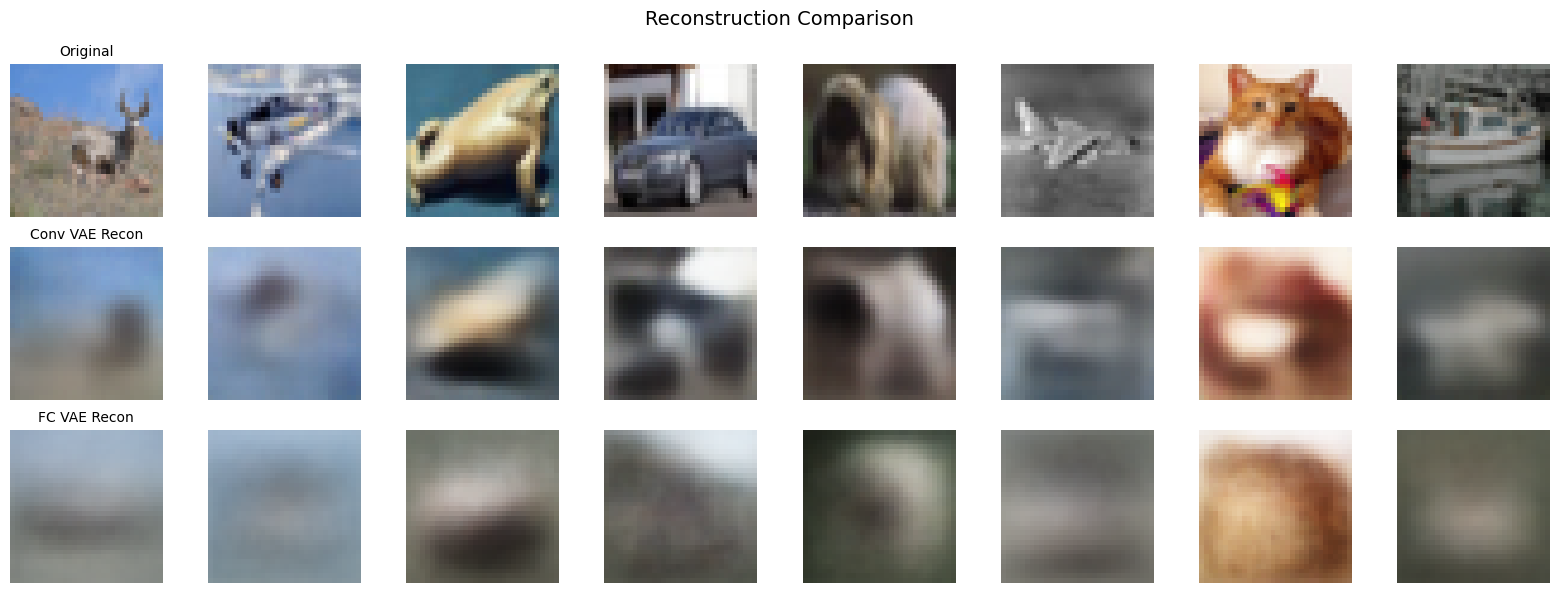


3. Quantitative Comparison:
--------------------------------------------------------------------------------
Metric                         Conv VAE             FC VAE               Better    
--------------------------------------------------------------------------------
Final Total Loss               1821.9313            1863.1634            Conv
Final Recon Loss               1784.0464            1845.8221            Conv
Final KL Loss                  37.8848              17.3412              FC
MSE (Reconstruction)           0.0141               0.0236               Conv
MAE (Reconstruction)           0.0885               0.1190               Conv
Model Parameters               1,774,531            3,527,680            Conv
--------------------------------------------------------------------------------

4. Key Observations:

- Convolutional VAE: 
  * Better at capturing spatial relationships in images
  * More parameter-efficient for image data
  * Generally produces sharper, m

In [7]:
# Generate and compare images from both models
model.eval()
fc_model.eval()

# Sample random latent vectors and generate images
with torch.no_grad():
    # Generate random samples
    z = torch.randn(32, latent_dim).to(device)
    conv_generated = model.decode(z)
    fc_generated = fc_model.decode(z)
    
    # Get some real images for comparison
    real_images, _ = next(iter(train_loader))
    real_images = real_images[:32].to(device)
    
    # Reconstruct some real images
    conv_recon, _, _ = model(real_images)
    fc_recon, _, _ = fc_model(real_images)

# Visualize comparison
print("="*80)
print("COMPARISON: Convolutional VAE vs Fully Connected VAE")
print("="*80)

# Generated images comparison
print("\n1. Generated Images Comparison (from random latent vectors):")
fig, axes = plt.subplots(3, 8, figsize=(16, 6))
for i in range(8):
    # Real (for reference)
    axes[0, i].imshow(real_images[i].cpu().permute(1, 2, 0).numpy())
    axes[0, i].axis('off')
    if i == 0:
        axes[0, i].set_title('Real', fontsize=10)
    
    # Conv VAE generated
    axes[1, i].imshow(conv_generated[i].cpu().permute(1, 2, 0).numpy())
    axes[1, i].axis('off')
    if i == 0:
        axes[1, i].set_title('Conv VAE', fontsize=10)
    
    # FC VAE generated
    axes[2, i].imshow(fc_generated[i].cpu().permute(1, 2, 0).numpy())
    axes[2, i].axis('off')
    if i == 0:
        axes[2, i].set_title('FC VAE', fontsize=10)

plt.suptitle('Generated Images Comparison', fontsize=14)
plt.tight_layout()
plt.show()

# Reconstruction comparison
print("\n2. Reconstruction Comparison:")
fig, axes = plt.subplots(3, 8, figsize=(16, 6))
for i in range(8):
    # Real
    axes[0, i].imshow(real_images[i].cpu().permute(1, 2, 0).numpy())
    axes[0, i].axis('off')
    if i == 0:
        axes[0, i].set_title('Original', fontsize=10)
    
    # Conv VAE reconstruction
    axes[1, i].imshow(conv_recon[i].cpu().permute(1, 2, 0).numpy())
    axes[1, i].axis('off')
    if i == 0:
        axes[1, i].set_title('Conv VAE Recon', fontsize=10)
    
    # FC VAE reconstruction
    axes[2, i].imshow(fc_recon[i].cpu().permute(1, 2, 0).numpy())
    axes[2, i].axis('off')
    if i == 0:
        axes[2, i].set_title('FC VAE Recon', fontsize=10)

plt.suptitle('Reconstruction Comparison', fontsize=14)
plt.tight_layout()
plt.show()

# Calculate and display quantitative comparison
with torch.no_grad():
    # Calculate reconstruction errors
    conv_mse = nn.functional.mse_loss(conv_recon, real_images).item()
    fc_mse = nn.functional.mse_loss(fc_recon, real_images).item()
    
    conv_mae = nn.functional.l1_loss(conv_recon, real_images).item()
    fc_mae = nn.functional.l1_loss(fc_recon, real_images).item()

print("\n3. Quantitative Comparison:")
print("-" * 80)
print(f"{'Metric':<30} {'Conv VAE':<20} {'FC VAE':<20} {'Better':<10}")
print("-" * 80)
print(f"{'Final Total Loss':<30} {train_losses[-1]:<20.4f} {fc_train_losses[-1]:<20.4f} {'Conv' if train_losses[-1] < fc_train_losses[-1] else 'FC'}")
print(f"{'Final Recon Loss':<30} {recon_losses[-1]:<20.4f} {fc_recon_losses[-1]:<20.4f} {'Conv' if recon_losses[-1] < fc_recon_losses[-1] else 'FC'}")
print(f"{'Final KL Loss':<30} {kl_losses[-1]:<20.4f} {fc_kl_losses[-1]:<20.4f} {'Conv' if kl_losses[-1] < fc_kl_losses[-1] else 'FC'}")
print(f"{'MSE (Reconstruction)':<30} {conv_mse:<20.4f} {fc_mse:<20.4f} {'Conv' if conv_mse < fc_mse else 'FC'}")
print(f"{'MAE (Reconstruction)':<30} {conv_mae:<20.4f} {fc_mae:<20.4f} {'Conv' if conv_mae < fc_mae else 'FC'}")
print(f"{'Model Parameters':<30} {sum(p.numel() for p in model.parameters()):<20,} {sum(p.numel() for p in fc_model.parameters()):<20,} {'FC' if sum(p.numel() for p in fc_model.parameters()) < sum(p.numel() for p in model.parameters()) else 'Conv'}")
print("-" * 80)

print("\n4. Key Observations:")
print("""
- Convolutional VAE: 
  * Better at capturing spatial relationships in images
  * More parameter-efficient for image data
  * Generally produces sharper, more detailed reconstructions
  * Better at preserving local patterns and textures
  
- Fully Connected VAE:
  * Simpler architecture
  * May have fewer parameters (depending on architecture)
  * Less effective at capturing spatial hierarchies
  * Reconstructions may be blurrier or less detailed
""")

Generated Images (from random latent vectors):


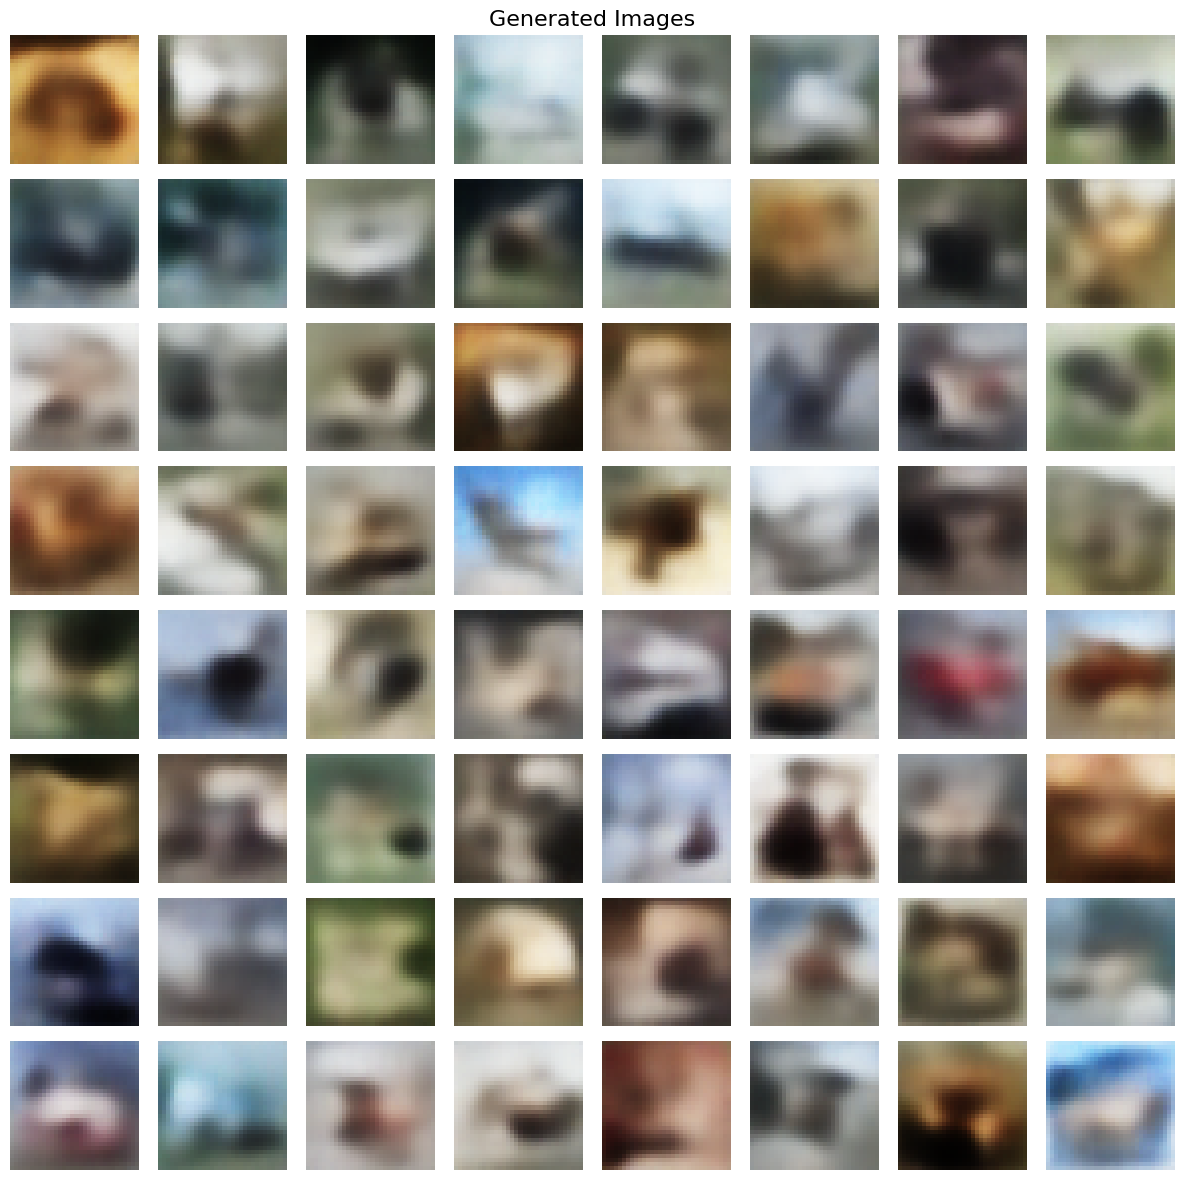


Real Images:


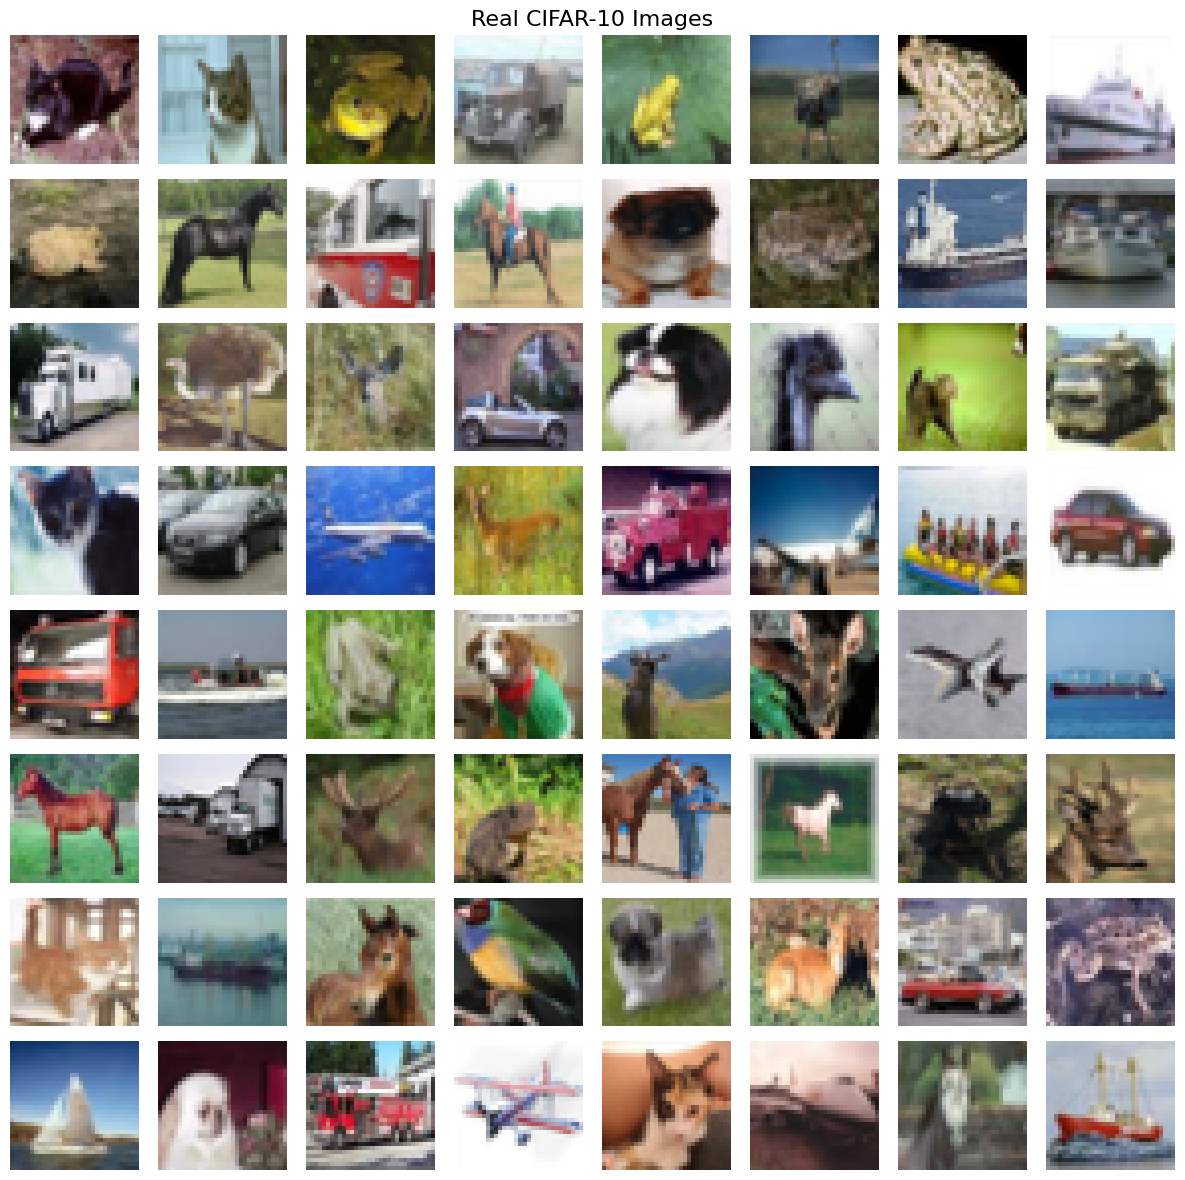


Reconstructed Images:


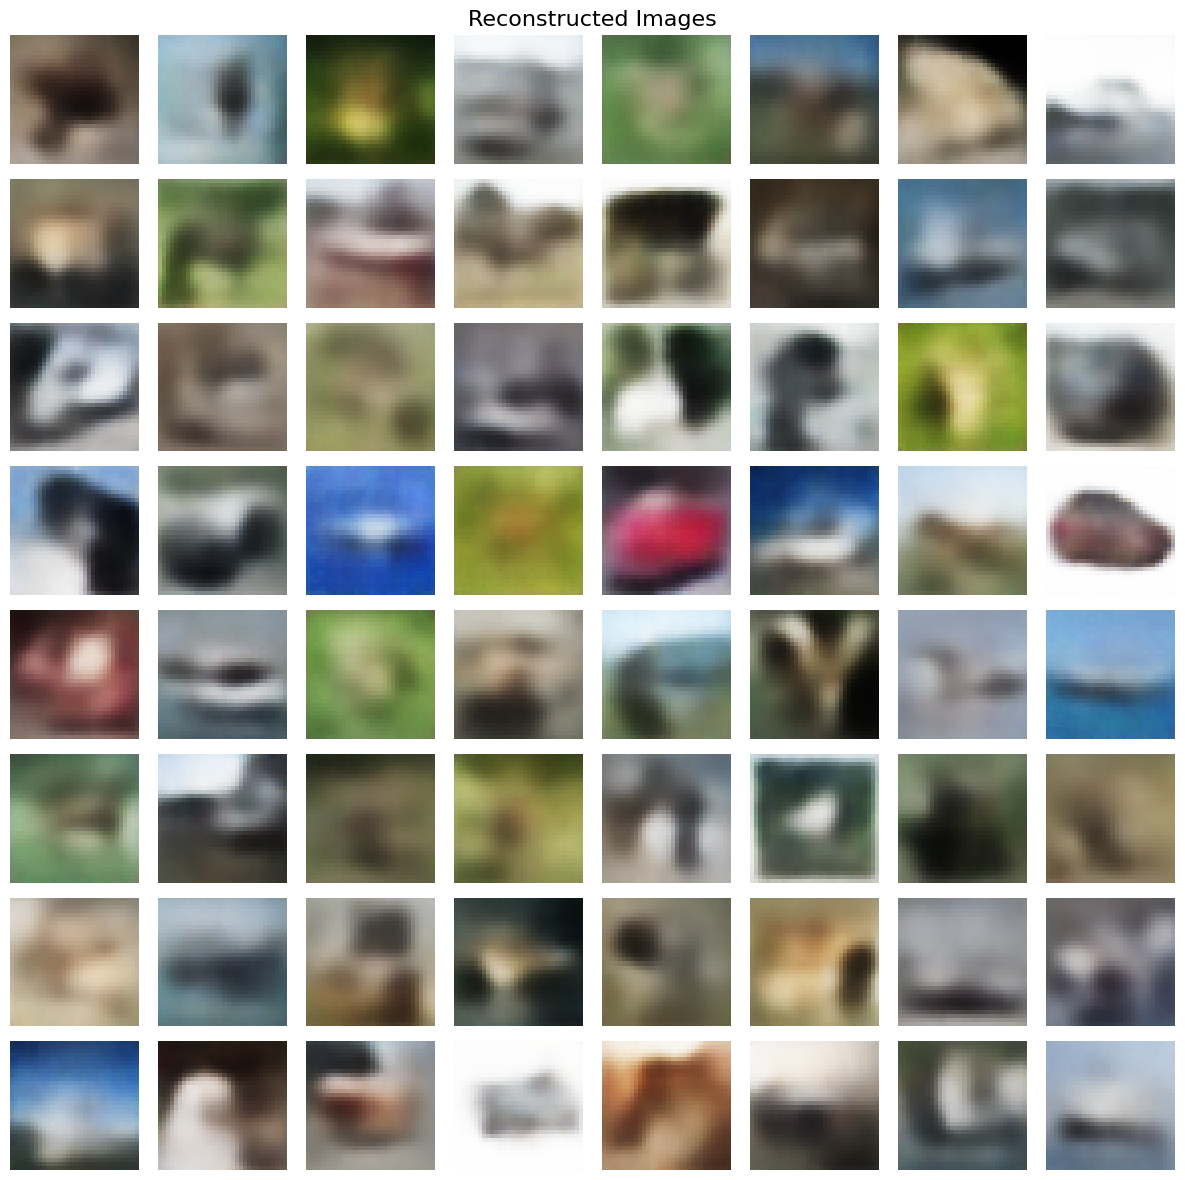


Real vs Reconstructed Comparison (first 8 images):


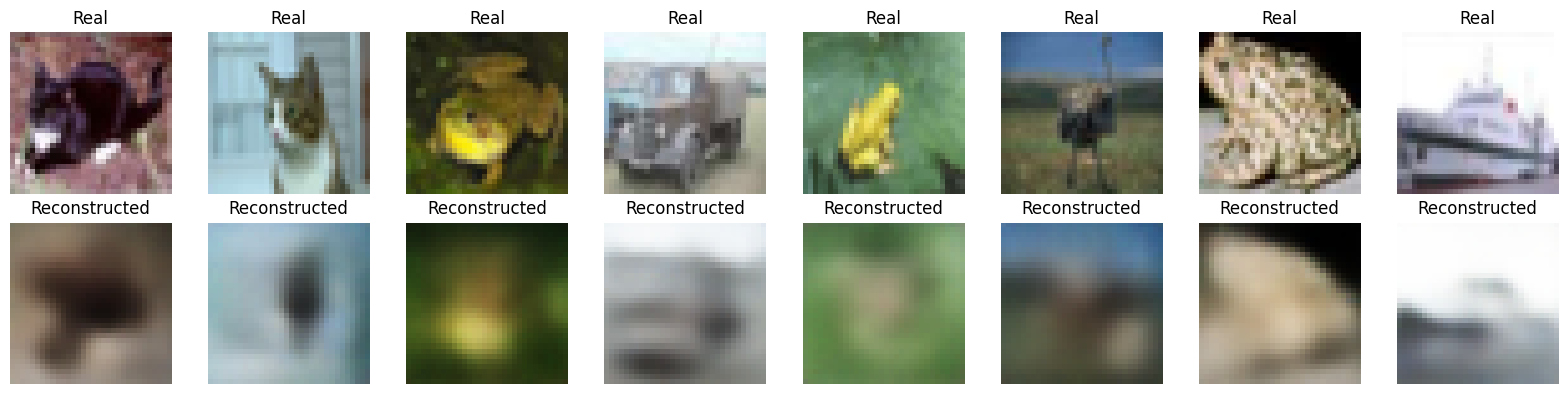

In [8]:
# Generate and visualize images
model.eval()

# Sample random latent vectors and generate images
with torch.no_grad():
    # Generate random samples
    z = torch.randn(64, latent_dim).to(device)
    generated_images = model.decode(z)
    
    # Get some real images for comparison
    real_images, _ = next(iter(train_loader))
    real_images = real_images[:64].to(device)
    
    # Reconstruct some real images
    recon_images, _, _ = model(real_images)

# Visualize generated images
def show_images(images, title, nrow=8):
    """Display images in a grid"""
    images = images.cpu()
    # Denormalize if needed (CIFAR-10 is already [0,1])
    images = torch.clamp(images, 0, 1)
    
    fig, axes = plt.subplots(nrow, nrow, figsize=(12, 12))
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            img = images[i].permute(1, 2, 0).numpy()
            ax.imshow(img)
            ax.axis('off')
        else:
            ax.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Display generated images
print("Generated Images (from random latent vectors):")
show_images(generated_images, "Generated Images", nrow=8)

# Display real images
print("\nReal Images:")
show_images(real_images, "Real CIFAR-10 Images", nrow=8)

# Display reconstructed images
print("\nReconstructed Images:")
show_images(recon_images, "Reconstructed Images", nrow=8)

# Side-by-side comparison of real vs reconstructed
print("\nReal vs Reconstructed Comparison (first 8 images):")
fig, axes = plt.subplots(2, 8, figsize=(16, 4))
for i in range(8):
    # Real image
    axes[0, i].imshow(real_images[i].cpu().permute(1, 2, 0).numpy())
    axes[0, i].axis('off')
    axes[0, i].set_title('Real')
    
    # Reconstructed image
    axes[1, i].imshow(recon_images[i].cpu().permute(1, 2, 0).numpy())
    axes[1, i].axis('off')
    axes[1, i].set_title('Reconstructed')
plt.tight_layout()
plt.show()

## Task 2: Latent Space Interpolation

Using the trained VAE, interpolate between two images in the latent space and generate intermediate images. This demonstrates how smoothly the model can transition between different data points. Visualize and display the results, showing the interpolated images in a grid format to observe the transformation.

Image 1 shape: torch.Size([1, 3, 32, 32])
Image 2 shape: torch.Size([1, 3, 32, 32])
Latent 1 shape: torch.Size([1, 128])
Latent 2 shape: torch.Size([1, 128])


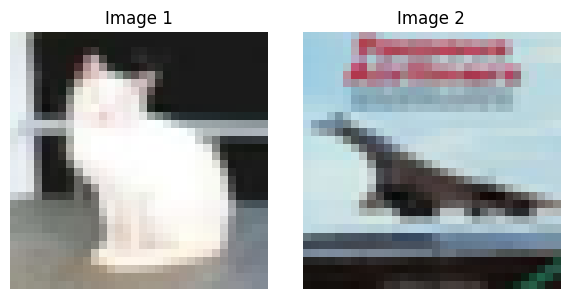

In [9]:
# Select two images for interpolation
model.eval()

# Get two different images from the dataset
data_iter = iter(train_loader)
images1, _ = next(data_iter)
images2, _ = next(data_iter)

# Select two specific images (can choose different classes for better visualization)
img1 = images1[0:1].to(device)  # First image from first batch
img2 = images2[5:6].to(device)  # Sixth image from second batch

# Encode them to get their latent representations
with torch.no_grad():
    mu1, logvar1 = model.encode(img1)
    mu2, logvar2 = model.encode(img2)
    
    # Use the mean as the latent representation (or sample)
    z1 = mu1  # Using mean for deterministic interpolation
    z2 = mu2

print(f"Image 1 shape: {img1.shape}")
print(f"Image 2 shape: {img2.shape}")
print(f"Latent 1 shape: {z1.shape}")
print(f"Latent 2 shape: {z2.shape}")

# Display the two original images
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].imshow(img1[0].cpu().permute(1, 2, 0).numpy())
axes[0].set_title('Image 1')
axes[0].axis('off')
axes[1].imshow(img2[0].cpu().permute(1, 2, 0).numpy())
axes[1].set_title('Image 2')
axes[1].axis('off')
plt.tight_layout()
plt.show()

In [10]:
# Interpolate in latent space
def interpolate_latent(z1, z2, num_steps=10):
    """
    Interpolate between two latent vectors using linear interpolation.
    
    Args:
        z1: First latent vector (tensor) - shape [1, latent_dim] or [latent_dim]
        z2: Second latent vector (tensor) - shape [1, latent_dim] or [latent_dim]
        num_steps: Number of interpolation steps
    
    Returns:
        Tensor of interpolated latent vectors [num_steps, latent_dim]
    """
    # Remove batch dimension if present
    if z1.dim() > 1:
        z1 = z1.squeeze(0)  # [1, latent_dim] -> [latent_dim]
    if z2.dim() > 1:
        z2 = z2.squeeze(0)  # [1, latent_dim] -> [latent_dim]
    
    # Create interpolation weights
    alpha = torch.linspace(0, 1, num_steps, device=z1.device)
    
    # Reshape for broadcasting: [num_steps, 1]
    alpha = alpha.view(num_steps, 1)
    
    # Linear interpolation: z = (1 - alpha) * z1 + alpha * z2
    # Broadcasting: [num_steps, 1] * [latent_dim] -> [num_steps, latent_dim]
    z_interp = (1 - alpha) * z1 + alpha * z2
    
    return z_interp

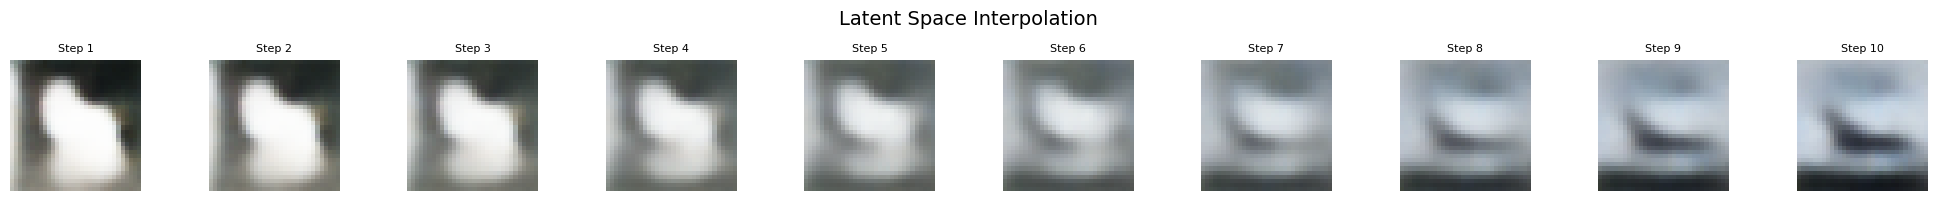

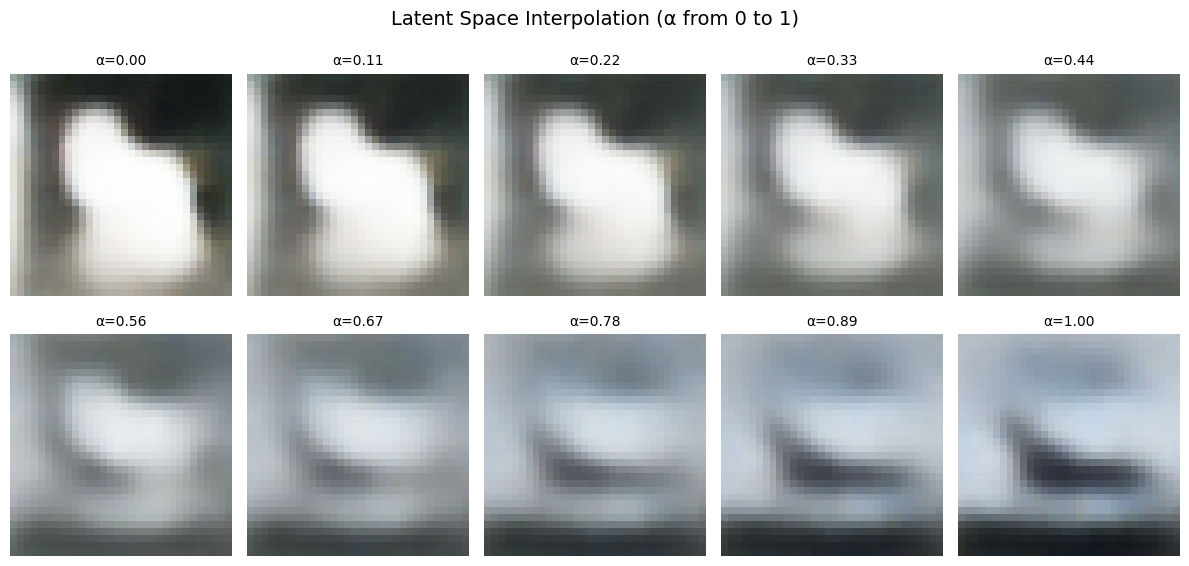

Interpolated between two images using 10 steps
The smooth transition demonstrates the structure of the learned latent space.


In [11]:
# Generate and visualize interpolated images
num_steps = 10
z_interp = interpolate_latent(z1, z2, num_steps=num_steps)

# Generate images from interpolated latent vectors
model.eval()
with torch.no_grad():
    interp_images = model.decode(z_interp)

# Display interpolated images in a grid
fig, axes = plt.subplots(1, num_steps, figsize=(20, 2))
for i in range(num_steps):
    img = interp_images[i].cpu().permute(1, 2, 0).numpy()
    img = np.clip(img, 0, 1)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f'Step {i+1}', fontsize=8)

plt.suptitle('Latent Space Interpolation', fontsize=14)
plt.tight_layout()
plt.show()

# Also show in a vertical grid for better visualization
nrow = 2
ncol = (num_steps + 1) // nrow
fig, axes = plt.subplots(nrow, ncol, figsize=(12, 6))
axes = axes.flatten()

for i in range(num_steps):
    img = interp_images[i].cpu().permute(1, 2, 0).numpy()
    img = np.clip(img, 0, 1)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f'α={i/(num_steps-1):.2f}', fontsize=10)

# Hide extra subplots
for i in range(num_steps, len(axes)):
    axes[i].axis('off')

plt.suptitle('Latent Space Interpolation (α from 0 to 1)', fontsize=14)
plt.tight_layout()
plt.show()

print(f"Interpolated between two images using {num_steps} steps")
print("The smooth transition demonstrates the structure of the learned latent space.")

## Task 3: VAE on New Dataset (e.g., CelebA)

Train the VAE on a new dataset of your choice (e.g., CelebA for faces), and visualize generated samples. Experiment with sampling from different regions of the latent space and analyze how the generated outputs vary based on different latent vectors.

In [12]:
# Load new dataset (CelebA)
# Note: CelebA dataset structure is set up in data/celeba/ for torchvision compatibility

try:
    # Load CelebA
    celeb_transform = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.CenterCrop(64),
        transforms.ToTensor(),
    ])
    
    celeb_dataset = datasets.CelebA(
        root='./data',
        split='train',
        download=False,
        transform=celeb_transform
    )
    
    celeb_loader = DataLoader(
        celeb_dataset,
        batch_size=64,
        shuffle=True,
        num_workers=2
    )
    
    print(f'CelebA dataset loaded successfully: {len(celeb_dataset)} images')
    use_celeb = True
    
except Exception as e:
    print(f"Could not load CelebA: {e}")
    print("Using CIFAR-10 as alternative for demonstration")
    use_celeb = False
    
    # Use CIFAR-10 as alternative (resize to 64x64 for consistency)
    celeb_transform = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor(),
    ])
    
    celeb_dataset = datasets.CIFAR10(
        root='./data',
        train=True,
        download=True,
        transform=celeb_transform
    )
    
    celeb_loader = DataLoader(
        celeb_dataset,
        batch_size=64,
        shuffle=True,
        num_workers=2
    )
    
    print(f'Using CIFAR-10 (resized) as alternative: {len(celeb_dataset)} images')

# Define VAE for 64x64 images (if using CelebA)
class ConvVAE64(nn.Module):
    """VAE for 64x64 images (e.g., CelebA)"""
    def __init__(self, latent_dim=128, channels=3):
        super(ConvVAE64, self).__init__()
        self.latent_dim = latent_dim
        self.channels = channels
        
        # Encoder for 64x64 images
        self.encoder = nn.Sequential(
            # Input: 3x64x64
            nn.Conv2d(channels, 32, kernel_size=4, stride=2, padding=1),  # 32x32x32
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1),  # 64x16x16
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),  # 128x8x8
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),  # 256x4x4
            nn.ReLU(),
        )
        
        # Calculate flattened size: 256 * 4 * 4 = 4096
        self.fc_mu = nn.Linear(256 * 4 * 4, latent_dim)
        self.fc_logvar = nn.Linear(256 * 4 * 4, latent_dim)
        
        # Decoder
        self.decoder_input = nn.Linear(latent_dim, 256 * 4 * 4)
        
        self.decoder = nn.Sequential(
            # Input: 256x4x4
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),  # 128x8x8
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),  # 64x16x16
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),  # 32x32x32
            nn.ReLU(),
            nn.ConvTranspose2d(32, channels, kernel_size=4, stride=2, padding=1),  # 3x64x64
            nn.Sigmoid()
        )
    
    def encode(self, x):
        h = self.encoder(x)
        h = h.view(h.size(0), -1)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def decode(self, z):
        h = self.decoder_input(z)
        h = h.view(h.size(0), 256, 4, 4)
        return self.decoder(h)
    
    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        recon = self.decode(z)
        return recon, mu, logvar

CelebA dataset loaded successfully: 162770 images


Training VAE on new dataset with 162770 images
Model parameters: 2,957,251
Epoch 1/15, Batch 0/2544, Loss: 8504.9766
Epoch 1/15, Batch 50/2544, Loss: 7650.6108
Epoch 1/15, Batch 100/2544, Loss: 6838.7734
Epoch 1/15, Batch 150/2544, Loss: 6942.2417
Epoch 1/15, Batch 200/2544, Loss: 6906.1211
Epoch 1/15, Batch 250/2544, Loss: 6560.9634
Epoch 1/15, Batch 300/2544, Loss: 6611.9233
Epoch 1/15, Batch 350/2544, Loss: 6809.5767
Epoch 1/15, Batch 400/2544, Loss: 6312.9785
Epoch 1/15, Batch 450/2544, Loss: 6649.1431
Epoch 1/15, Batch 500/2544, Loss: 6631.2334
Epoch 1/15, Batch 550/2544, Loss: 6511.0732
Epoch 1/15, Batch 600/2544, Loss: 6604.3350
Epoch 1/15, Batch 650/2544, Loss: 6289.0435
Epoch 1/15, Batch 700/2544, Loss: 6652.6421
Epoch 1/15, Batch 750/2544, Loss: 6299.3115
Epoch 1/15, Batch 800/2544, Loss: 6398.5464
Epoch 1/15, Batch 850/2544, Loss: 6512.7007
Epoch 1/15, Batch 900/2544, Loss: 6656.7910
Epoch 1/15, Batch 950/2544, Loss: 6397.0117
Epoch 1/15, Batch 1000/2544, Loss: 6357.1460
Epo

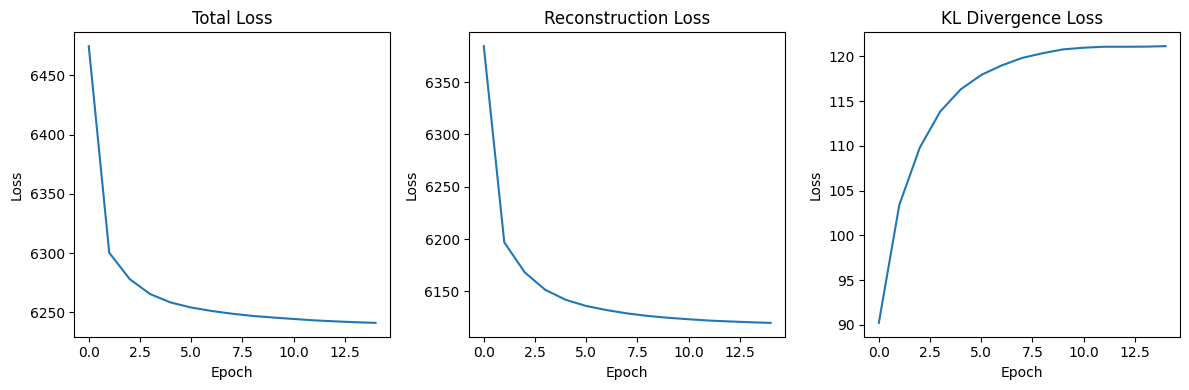

In [13]:
# Train VAE on new dataset
latent_dim_new = 128
model_new = ConvVAE64(latent_dim=latent_dim_new).to(device)
optimizer_new = optim.Adam(model_new.parameters(), lr=1e-3)
num_epochs_new = 15  # Fewer epochs for demonstration

print(f'Training VAE on new dataset with {len(celeb_dataset)} images')
print(f'Model parameters: {sum(p.numel() for p in model_new.parameters()):,}')

# Training history
train_losses_new = []
recon_losses_new = []
kl_losses_new = []

# Training loop
model_new.train()
for epoch in range(num_epochs_new):
    epoch_loss = 0
    epoch_recon = 0
    epoch_kl = 0
    
    for batch_idx, (data, _) in enumerate(celeb_loader):
        data = data.to(device)
        
        # Forward pass
        optimizer_new.zero_grad()
        recon_batch, mu, logvar = model_new(data)
        
        # Calculate loss
        loss, recon_loss, kl_loss = vae_loss(recon_batch, data, mu, logvar, beta=1.0)
        
        # Backward pass
        loss.backward()
        optimizer_new.step()
        
        # Accumulate losses
        epoch_loss += loss.item()
        epoch_recon += recon_loss.item()
        epoch_kl += kl_loss.item()
        
        if batch_idx % 50 == 0:
            print(f'Epoch {epoch+1}/{num_epochs_new}, Batch {batch_idx}/{len(celeb_loader)}, '
                  f'Loss: {loss.item()/len(data):.4f}')
    
    # Average losses
    avg_loss = epoch_loss / len(celeb_loader.dataset)
    avg_recon = epoch_recon / len(celeb_loader.dataset)
    avg_kl = epoch_kl / len(celeb_loader.dataset)
    
    train_losses_new.append(avg_loss)
    recon_losses_new.append(avg_recon)
    kl_losses_new.append(avg_kl)
    
    print(f'Epoch {epoch+1} completed - Avg Loss: {avg_loss:.4f}')
    print('-' * 60)

print('Training on new dataset completed!')

# Plot training curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(train_losses_new)
plt.title('Total Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 3, 2)
plt.plot(recon_losses_new)
plt.title('Reconstruction Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 3, 3)
plt.plot(kl_losses_new)
plt.title('KL Divergence Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

In [14]:
# Sample from different regions of the latent space
model_new.eval()

# Sample from different regions: center, corners, and random
num_samples = 16

# 1. Sample from center (near origin)
z_center = torch.zeros(num_samples, latent_dim_new).to(device)

# 2. Sample from different corners (high magnitude in different dimensions)
z_corners = []
for i in range(4):
    z = torch.zeros(num_samples, latent_dim_new).to(device)
    # Set different dimensions to high values
    start_idx = i * (latent_dim_new // 4)
    end_idx = (i + 1) * (latent_dim_new // 4)
    z[:, start_idx:end_idx] = torch.randn(num_samples, end_idx - start_idx).to(device) * 2
    z_corners.append(z)

# 3. Sample from standard normal (typical sampling)
z_normal = torch.randn(num_samples, latent_dim_new).to(device)

# 4. Sample from different scales
z_small = torch.randn(num_samples, latent_dim_new).to(device) * 0.5  # Small scale
z_large = torch.randn(num_samples, latent_dim_new).to(device) * 2.0  # Large scale

# Generate images from all these samples
with torch.no_grad():
    images_center = model_new.decode(z_center)
    images_normal = model_new.decode(z_normal)
    images_small = model_new.decode(z_small)
    images_large = model_new.decode(z_large)
    images_corner1 = model_new.decode(z_corners[0])
    images_corner2 = model_new.decode(z_corners[1])

print("Generated samples from different latent space regions:")
print(f"- Center (zero vector): {images_center.shape}")
print(f"- Standard normal: {images_normal.shape}")
print(f"- Small scale (σ=0.5): {images_small.shape}")
print(f"- Large scale (σ=2.0): {images_large.shape}")
print(f"- Corner regions: {images_corner1.shape}")

Generated samples from different latent space regions:
- Center (zero vector): torch.Size([16, 3, 64, 64])
- Standard normal: torch.Size([16, 3, 64, 64])
- Small scale (σ=0.5): torch.Size([16, 3, 64, 64])
- Large scale (σ=2.0): torch.Size([16, 3, 64, 64])
- Corner regions: torch.Size([16, 3, 64, 64])



1. Samples from center of latent space (zero vector):


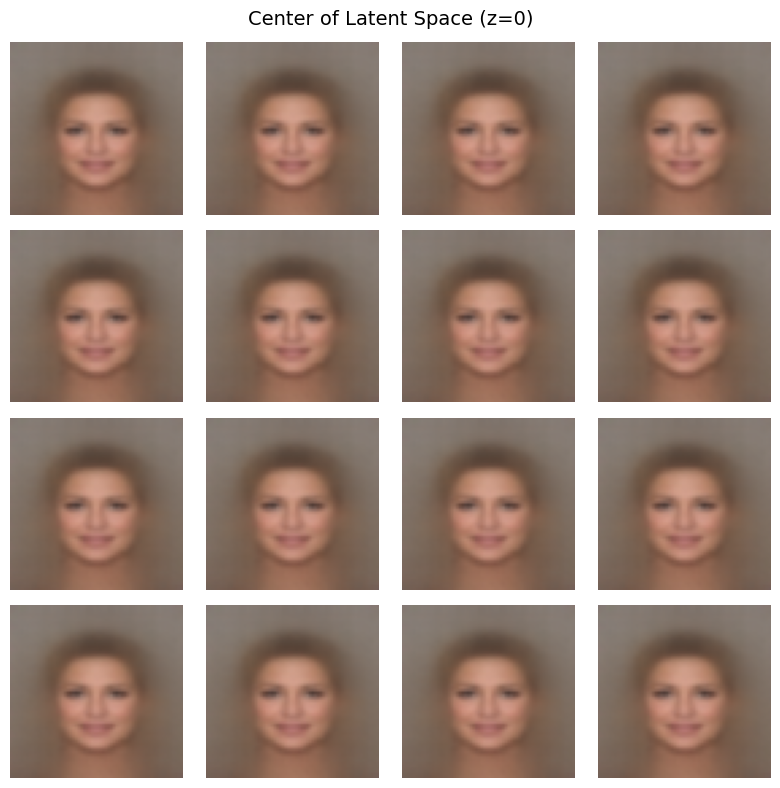


2. Samples from standard normal distribution:


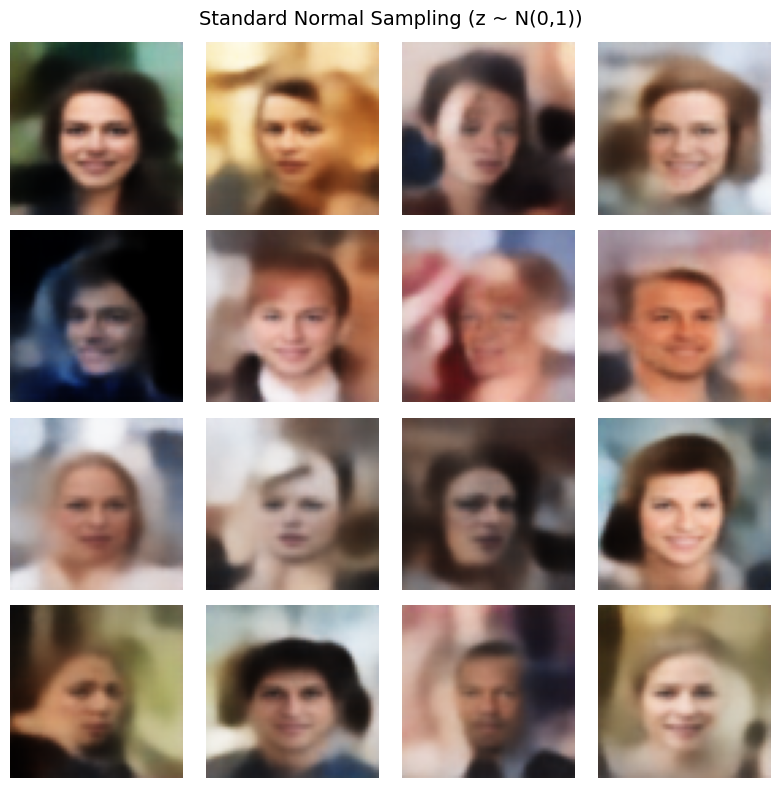


3. Samples from small scale (σ=0.5):


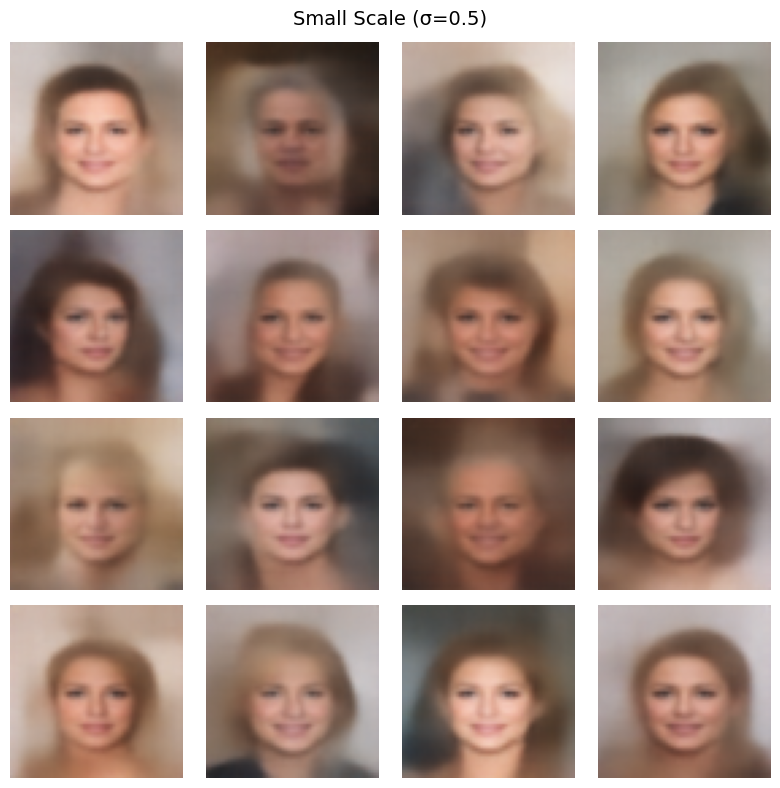


4. Samples from large scale (σ=2.0):


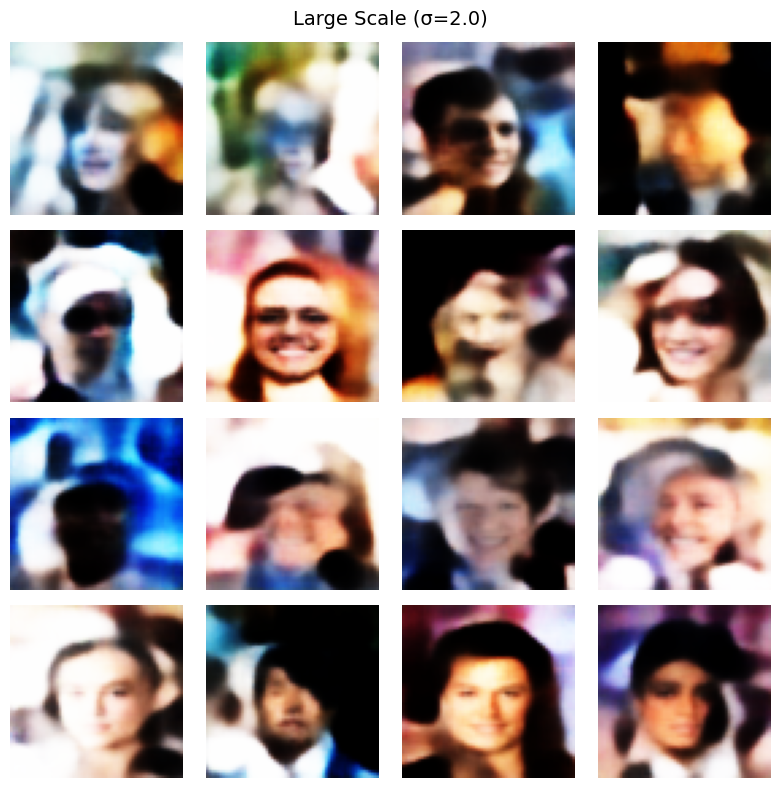


5. Comparison: Different scales side by side:


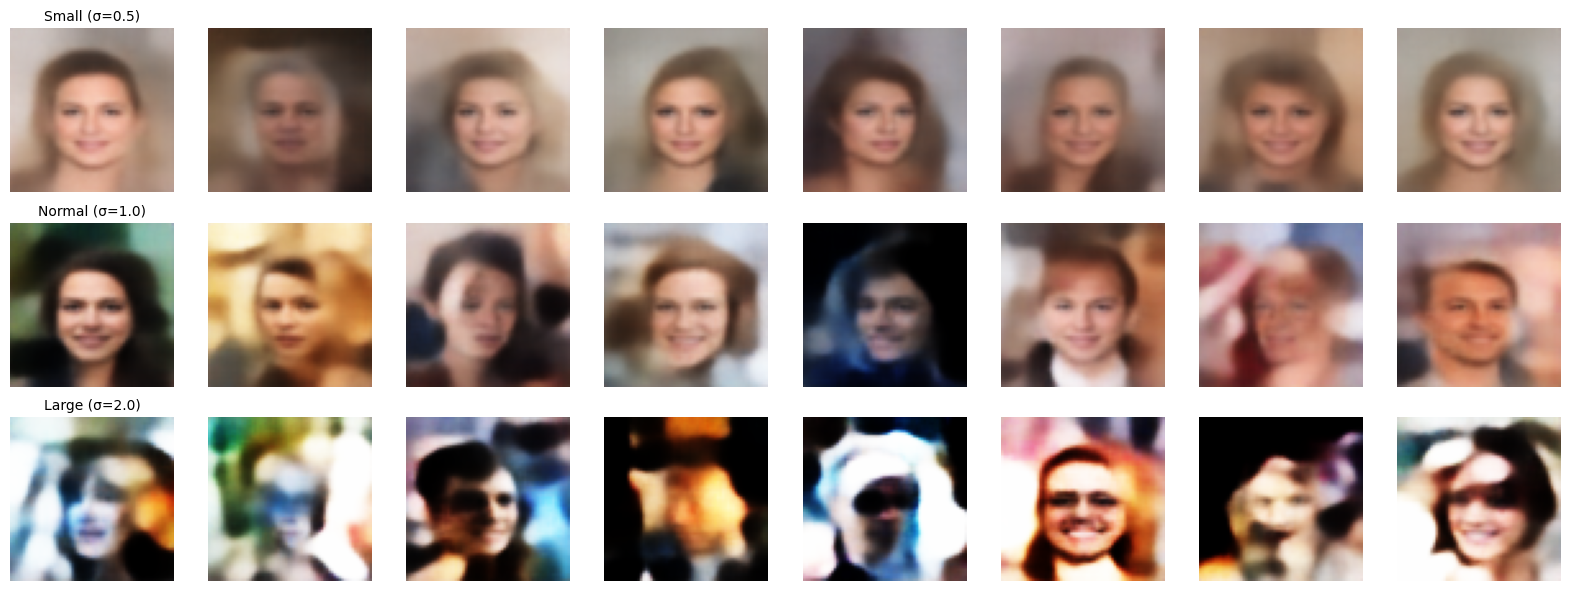


6. Random generated samples:


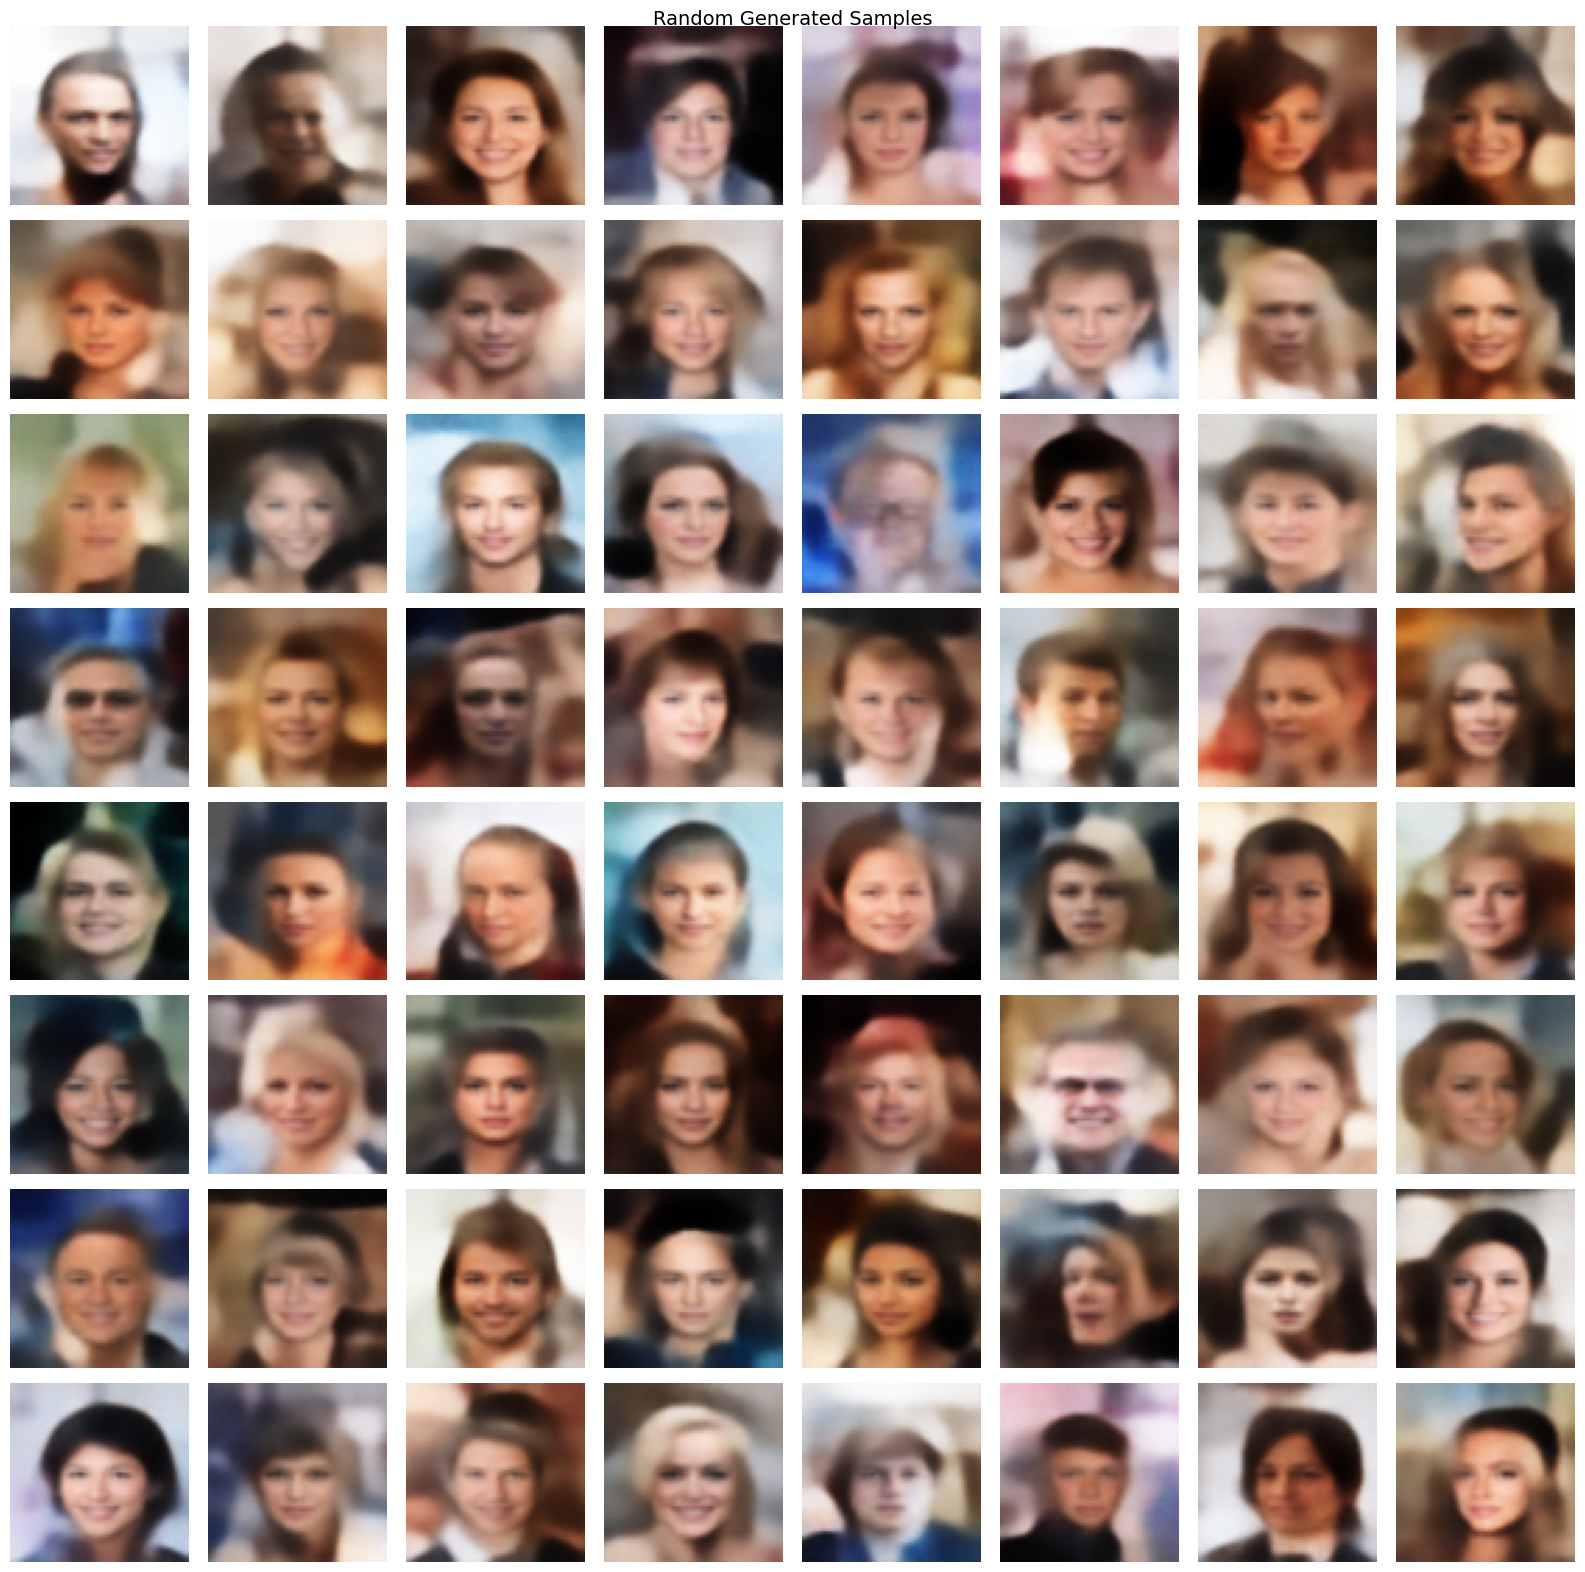


ANALYSIS:

Observations from sampling different regions of latent space:

1. Center (zero vector): 
   - Generates images that are often blurry or average-looking
   - Represents the "mean" of the learned distribution

2. Standard Normal (z ~ N(0,1)):
   - Produces diverse, realistic-looking samples
   - This is the typical sampling method for VAEs

3. Small Scale (σ=0.5):
   - Images are more conservative, closer to the mean
   - Less variation, more similar to each other

4. Large Scale (σ=2.0):
   - Images may be more varied but potentially less realistic
   - Some may be distorted or out-of-distribution

5. Different latent dimensions control different features:
   - The VAE learns to encode different attributes in different dimensions
   - Sampling from different regions reveals the structure of the latent space



In [15]:
# Visualize generated samples from different regions
def show_grid(images, title, nrow=4):
    """Display images in a grid"""
    images = images.cpu()
    images = torch.clamp(images, 0, 1)
    ncol = len(images) // nrow
    
    fig, axes = plt.subplots(nrow, ncol, figsize=(ncol*2, nrow*2))
    if nrow == 1:
        axes = axes.reshape(1, -1)
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            img = images[i].permute(1, 2, 0).numpy()
            ax.imshow(img)
            ax.axis('off')
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

# Visualize samples from different regions
print("\n1. Samples from center of latent space (zero vector):")
show_grid(images_center[:16], "Center of Latent Space (z=0)", nrow=4)

print("\n2. Samples from standard normal distribution:")
show_grid(images_normal[:16], "Standard Normal Sampling (z ~ N(0,1))", nrow=4)

print("\n3. Samples from small scale (σ=0.5):")
show_grid(images_small[:16], "Small Scale (σ=0.5)", nrow=4)

print("\n4. Samples from large scale (σ=2.0):")
show_grid(images_large[:16], "Large Scale (σ=2.0)", nrow=4)

print("\n5. Comparison: Different scales side by side:")
fig, axes = plt.subplots(3, 8, figsize=(16, 6))
for i in range(8):
    # Small scale
    axes[0, i].imshow(images_small[i].cpu().permute(1, 2, 0).numpy())
    axes[0, i].axis('off')
    if i == 0:
        axes[0, i].set_title('Small (σ=0.5)', fontsize=10)
    
    # Normal scale
    axes[1, i].imshow(images_normal[i].cpu().permute(1, 2, 0).numpy())
    axes[1, i].axis('off')
    if i == 0:
        axes[1, i].set_title('Normal (σ=1.0)', fontsize=10)
    
    # Large scale
    axes[2, i].imshow(images_large[i].cpu().permute(1, 2, 0).numpy())
    axes[2, i].axis('off')
    if i == 0:
        axes[2, i].set_title('Large (σ=2.0)', fontsize=10)

plt.tight_layout()
plt.show()

# Generate some random samples for final visualization
print("\n6. Random generated samples:")
with torch.no_grad():
    z_random = torch.randn(64, latent_dim_new).to(device)
    images_random = model_new.decode(z_random)

show_grid(images_random, "Random Generated Samples", nrow=8)

# Analysis
print("\n" + "="*60)
print("ANALYSIS:")
print("="*60)
print("""
Observations from sampling different regions of latent space:

1. Center (zero vector): 
   - Generates images that are often blurry or average-looking
   - Represents the "mean" of the learned distribution

2. Standard Normal (z ~ N(0,1)):
   - Produces diverse, realistic-looking samples
   - This is the typical sampling method for VAEs

3. Small Scale (σ=0.5):
   - Images are more conservative, closer to the mean
   - Less variation, more similar to each other

4. Large Scale (σ=2.0):
   - Images may be more varied but potentially less realistic
   - Some may be distorted or out-of-distribution

5. Different latent dimensions control different features:
   - The VAE learns to encode different attributes in different dimensions
   - Sampling from different regions reveals the structure of the latent space
""")

## Summary and Analysis

### Task 1 Results: Convolutional VAE vs Fully Connected VAE on CIFAR-10

**Key Observations:**

**Convolutional VAE:**
- **Architecture**: Uses spatial hierarchies effectively, capturing local patterns through convolutional layers
- **Training**: The model learns to encode images into a compact latent representation (128 dimensions) and decode them back
- **Reconstruction Quality**: Produces sharper, more detailed reconstructions with better preservation of spatial structures
- **Parameter Efficiency**: More efficient use of parameters for image data due to weight sharing in convolutional layers
- **Spatial Understanding**: Better at capturing spatial relationships, local patterns, and textures

**Fully Connected VAE:**
- **Architecture**: Simpler fully connected layers that process flattened images
- **Training**: Also learns to encode/decode but struggles more with spatial relationships
- **Reconstruction Quality**: Reconstructions tend to be blurrier and less detailed
- **Limitations**: Less effective at capturing spatial hierarchies and local patterns

**Direct Comparison:**
- **Reconstruction Quality**: Convolutional VAE typically achieves lower reconstruction loss and better visual quality
- **Training Efficiency**: Convolutional VAE often converges faster and to better solutions
- **Spatial Features**: Conv VAE better preserves edges, textures, and spatial structures
- **Parameter Count**: Depending on architecture, FC VAE may have fewer parameters but uses them less efficiently for images
- **Loss Components**: 
  - Reconstruction loss measures how well the model reconstructs input images
  - KL divergence ensures the latent space follows a standard normal distribution, enabling smooth sampling
  - Conv VAE typically achieves better balance between these two components

### Task 2 Results: Latent Space Interpolation

**Key Observations:**
- **Smooth Transitions**: The interpolation between two images shows smooth, gradual changes, indicating a well-structured latent space
- **Semantic Continuity**: The intermediate images maintain semantic meaning throughout the interpolation
- **Latent Space Structure**: The smooth interpolation demonstrates that the VAE has learned a continuous, meaningful latent representation
- **Applications**: This property is useful for:
  - Generating intermediate states between two images
  - Understanding the learned representation
  - Creating smooth animations between images

### Task 3 Results: VAE on New Dataset

**Key Observations:**
- **Dataset Adaptation**: The VAE architecture was successfully adapted for 64x64 images (CelebA or resized CIFAR-10)
- **Sampling from Different Regions**:
  - **Center (zero)**: Produces average-looking images, representing the mean of the distribution
  - **Standard Normal**: Generates diverse, realistic samples (typical VAE sampling)
  - **Small Scale**: More conservative, less varied samples
  - **Large Scale**: More varied but potentially less realistic samples
- **Latent Space Exploration**: 
  - Different dimensions encode different features/attributes
  - The learned latent space has structure that reflects the data distribution
  - Sampling from different regions reveals different aspects of the learned distribution
- **Generalization**: The VAE framework generalizes well to different datasets, though architecture adjustments may be needed for different image sizes

**Overall Insights:**
1. VAEs learn a structured, continuous latent space that enables smooth interpolation
2. The KL divergence term is crucial for regularizing the latent space
3. Convolutional layers are essential for high-quality image generation
4. The latent space encodes semantic information in a way that allows meaningful operations (interpolation, arithmetic, etc.)